<p style="text-align:left;">
    M1 Biostatistic
    <span style="float:right;">
        May 2020
    </span>
</p>
Authors: Lefort Tanguy, Coiffier Ophélie and Gaizi Ibrahim

*********************

# <center>Chaoseverywhere package </center>

<img src="https://raw.githubusercontent.com/tanglef/chaoseverywhere/b8f51140d20ca6eb8866e551e0c38c40b31aaa76/doc/_static/logo1_f.svg" alt="Logo" width="300" height="100">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Generalities-" data-toc-modified-id="1.-Generalities--1">1. Generalities <a name="gen"></a></a></span><ul class="toc-item"><li><span><a href="#A.-About-chaoseverywhere-" data-toc-modified-id="A.-About-chaoseverywhere--1.1">A. About chaoseverywhere <a name="about"></a></a></span></li><li><span><a href="#B.-Setup-for-the-report-" data-toc-modified-id="B.-Setup-for-the-report--1.2">B. Setup for the report <a name="setup"></a></a></span></li><li><span><a href="#C.-Define-the-concepts-" data-toc-modified-id="C.-Define-the-concepts--1.3">C. Define the concepts <a name="defs"></a></a></span></li></ul></li><li><span><a href="#2.-The-logistic-map-" data-toc-modified-id="2.-The-logistic-map--2">2. The logistic map <a name="logmap"></a></a></span><ul class="toc-item"><li><span><a href="#A.-Definition-" data-toc-modified-id="A.-Definition--2.1">A. Definition <a name="def_logi"></a></a></span></li><li><span><a href="#B.-Interact-with-the-cobweb-diagram-" data-toc-modified-id="B.-Interact-with-the-cobweb-diagram--2.2">B. Interact with the cobweb diagram <a name="cobweb"></a></a></span></li><li><span><a href="#C.-Animate-the-cobweb-diagram-" data-toc-modified-id="C.-Animate-the-cobweb-diagram--2.3">C. Animate the cobweb diagram <a name="cob_ani"></a></a></span></li><li><span><a href="#D.-The-bifurcation-diagram-" data-toc-modified-id="D.-The-bifurcation-diagram--2.4">D. The bifurcation diagram <a name="bifu"></a></a></span></li></ul></li><li><span><a href="#3.-The-Mandelbrot-set-" data-toc-modified-id="3.-The-Mandelbrot-set--3">3. The Mandelbrot set <a name="mandel"></a></a></span><ul class="toc-item"><li><span><a href="#A.-Description-" data-toc-modified-id="A.-Description--3.1">A. Description <a name="desc"></a></a></span></li><li><span><a href="#B.-Divergence-speed-and-computation-" data-toc-modified-id="B.-Divergence-speed-and-computation--3.2">B. Divergence speed and computation <a name="speed"></a></a></span></li><li><span><a href="#C-Transformation-of-the-Mandelbrot-set-" data-toc-modified-id="C-Transformation-of-the-Mandelbrot-set--3.3">C Transformation of the Mandelbrot set <a name="transform"></a></a></span></li></ul></li><li><span><a href="#4.-Visualization-of-the-link-" data-toc-modified-id="4.-Visualization-of-the-link--4">4. Visualization of the link <a name="visu"></a></a></span></li><li><span><a href="#5.-Conclusion-" data-toc-modified-id="5.-Conclusion--5">5. Conclusion <a name="conclu"></a></a></span></li></ul></div>

## 1. Generalities <a name="gen"></a>
### A. About chaoseverywhere <a name="about"></a>

Chaoseverywhere is a Python$3$ package that includes two main themes: 
+ the Mandelbrot set,
+ the logistic map.

Using this package, we can observe the link between the Mandelbrot set and the bifurcation diagram of the logistic map.

In a first part, we will draw the logistic map and its bifurcation diagram. An animation and an interactive plot are available in order to watch the behavior of the logistic map its link to the chaos theory.

In a second part, we draw the Mandelbrot set and zoom in it. We also consider the coordinates of the points in the Mandelbrot set and their associated speed of divergence. Finally, we look at a way to construct a $3$D visualization of the data collected.

### B. Setup for the report <a name="setup"></a>
To create the figures below and manipulate them, we need to import some packages and configure them.

<div class="alert alert-block alert-info">
<b>Note:</b> If you want to use the interactiveness with the cobweb diagrams, please run the next cell manually at least once.
</div>

In [1]:
# to manipulate the paths
import sys
import os
# to manipulate the data generated
import numpy as np
# to display and use the interactiveness of IPython
from ipywidgets import interact, FloatSlider, fixed, IntSlider, HBox, VBox, ToggleButtons, Tab, Button, ColorPicker
import matplotlib.pyplot as plt
from IPython.display import HTML, clear_output
from matplotlib import rc
params = {'axes.labelsize': 12,
          'font.size': 12,
          'legend.fontsize': 12,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': True,
          'figure.figsize': (7, 5),
          'animation.html': 'html5',
          'font.family': 'sans-serif'}
plt.rcParams.update(params)
%matplotlib notebook
# To display "interactive" mayavi plot embedded in the notebook
from mayavi import mlab
mlab.init_notebook()

Notebook initialized with ipy backend.


We also need to import our package `chaoseverywhere` too. It will allow us to use all the functions that we made to draw the plots, define the logistic map, use pre-made animations, $\dots$ 

In [2]:
sys.path.append(os.path.dirname(
    os.path.abspath('chaoseverywhere')) + (os.path.sep + '..'))
import chaoseverywhere as chaos

### C. Define the concepts <a name="defs"></a>
Our subject deals with both fractals and the chaos theory. Let's briefly define those two. Along this report, we will explain them more using animations.

Firstly, the chaos in mathematic is study of the patterns one can find in a system that seems totally random. Actually, a system is considered chaotic if: 
1. it's sensitive to the initial conditions: the slightest modification will have larger effect on the trajectory considered,
1. every point can be approached by periodic orbits,
1. any region of the phase space (meaning all the possible states) will intersect another region (it is called the [topological mixing](https://en.wikipedia.org/wiki/Mixing_(mathematics)#Topological_mixing )).



<div class="alert alert-block alert-info">
<b>Note:</b> Depending on the the characteristics observed and the system, these conditions may change. In this package, we mainly consider the first two.
</div>


Secondly, a fractal is an object that has at least one of the following characteristics:
1. a self-similarity at different scale,
1. self-similar structures can be observed within the figure,
1. the [Haussdorff dimension](https://en.wikipedia.org/wiki/Hausdorff_dimension) isn't an integer.

## 2. The logistic map <a name="logmap"></a>
### A. Definition <a name="def_logi"></a>

Let $r\in [0,4]$ be the growth ratio of the logistic map and $x_0\in [0,1]$ the starting point.
The logistic map is the non linear sequence: $x_{n+1}=rx_n(1-x_n)$.
We can also look at the associated function: $f(x)=rx(1-x)$.

Firstly, let's study an example with $r = 1.9$, $x_0 = 0.01$. In the package function, we set the parameter `iteration` to $100$. Indeed, `iteration` represents the number of iteration to draw the sequence and lets us see the asymptotic behavior of the sequence if big enough.
Before drawing the logistic sequence, lets take a look at the first iterate of the map:

In [3]:
fx = chaos.logistic(r=1.9, x=0.01)
print("f(0.01)=", fx, ".")

f(0.01)= 0.01881 .


### B. Interact with the cobweb diagram <a name="cobweb"></a>

In order to visualize the behavior, we can look at the cobweb plot. We draw the first bisector and keep track of the logistic map with the parameters defined above. Moreover, we can add the number of points that we want between $0$ and $1$ on the $x$-axis of the plot . Here, we choose to set it to `points = 100`.

<IPython.core.display.Javascript object>


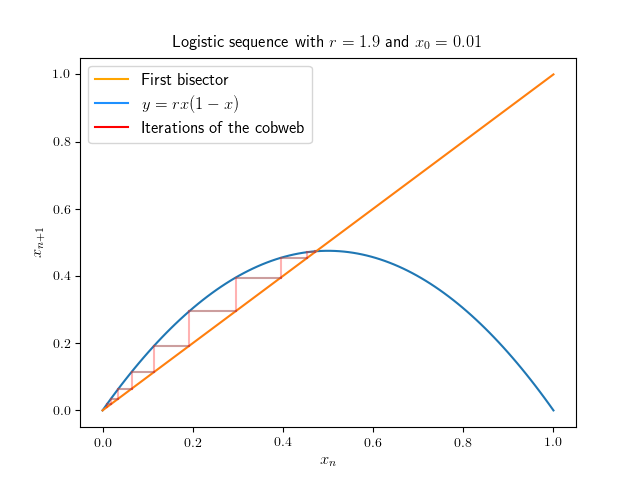

In [4]:
chaos.logistic_draw(0.01, 1.9, 100, 100)
fig = plt.gca()
plt.title(r'Logistic sequence with $r=1.9$ and $x_0=0.01$')
plt.xlabel(r'$x_n$')
plt.ylabel(r'$x_{n+1}$')
plt.plot([], [], color='orange', label='First bisector')
plt.plot([], [], color='dodgerblue', label='$y=rx(1-x)$')
plt.plot([], [], color='red', label='Iterations of the cobweb')
plt.legend()
plt.show()

So, starting at $0.01$ with a growth ration of $1.9$, we notice that the sequence tends to:
$$\lim_{n\rightarrow\infty}x_n\simeq 1.47.$$
Let's look at another example, changing the growth ratio but keeping the starting point. We use $r = 3.6$, $x_0 = 0.01$, and set `iteration` to $50$ and `points` to $100$.

<IPython.core.display.Javascript object>


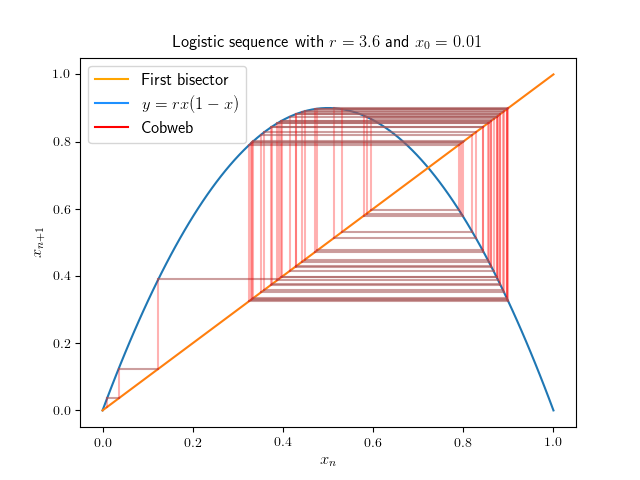

In [5]:
chaos.logistic_draw(0.01, 3.6, 50, 100)
fig = plt.gca()
plt.title(r'Logistic sequence with $r=3.6$ and $x_0=0.01$')
plt.xlabel(r'$x_n$')
plt.ylabel(r'$x_{n+1}$')
plt.plot([], [], color='orange', label='First bisector')
plt.plot([], [], color='dodgerblue', label='$y=rx(1-x)$')
plt.plot([], [], color='red', label='Cobweb')
plt.legend(loc='upper left')
plt.show()

We observe that the sequence doesn't tend to one point. So changing only the growth ratio has an impact on the convergence, but what about changing the starting point even both parameters ?

In [6]:
# please make sure you only have 2 interactive matplotlib graphs before running
x0 = FloatSlider(min=0, max=1, step=.001, value=.01,
                 continuous_update=False, description='x0')
r = FloatSlider(min=1, max=4, step=0.001,
                continuous_update=False, value=3.83, description='r')
iterates = ToggleButtons(
    options=[10, 50, 100, 150, 200], description='Iterations:',)
coloring = ColorPicker(description='Cobweb color:',
                       value='red',
                       )
tabparams = VBox(children=[x0, r, iterates])
tabstyle = VBox(children=[coloring])
tab = Tab(children=[tabparams, tabstyle])
tab.set_title(0, 'parameters')
tab.set_title(1, 'coloring the cobweb')
button = Button(
    description="Let's see the result!",
)

@button.on_click
def plot_on_click(b):
    if plt.fignum_exists(3):
        plt.gca()
        chaos.plot_logi_interact(
        x0.value, r.value, iterates.value, linsdim=100, colors=coloring.value)
    else:        
        plt.figure()
        chaos.plot_logi_interact(
        x0.value, r.value, iterates.value, linsdim=100, colors=coloring.value)

VBox(children=[tab, button])

We observe that the chaotic behavior appears when the coefficient $r$ is superior or equal to $3.57$. But there's also the issue of the starting point.

If we choose $r < 3.57$, we don't see any chaotic behavior, whereas we see it when $r \geq 3.57$.

There are several behaviors we can detect:
1. for any starting point, if $r\leq 1$ then the population dies *ie* $x_n$ tends to $0$,
1. for any starting point, if $1<r\leq 3$ then $x_n$ tends to $\frac{r-1}{r}$,
1. for any starting point, if $3<r < 3.57$ then $x_n$ oscillates between several values (the number of states being a power of $2$),
1. for $r\geq 3.57$ any change on the starting point will cause new oscillations.


<div class="alert alert-block alert-info">
<b>Note:</b> For $r\geq 3.57$, for some values of $x_0$ and $r$ we can see specific behaviors happening with very simple oscillations between a few values. One can see it setting the value on $r=3.83$ and $x_0=0.01$ (or by relaunching the cell, those values being set by default.)
</div>


### C. Animate the cobweb diagram <a name="cob_ani"></a>

We created an easy access function to get the animation of the logistic map cobweb diagram for $r\in[0,4]$. The parameter $r$ changes as the animation leads, we fixed the starting point to $0.01$.

In [7]:
ani = chaos.animate_logistic(save=False)
clear_output(wait=True)
ani

### D. The bifurcation diagram <a name="bifu"></a>
To observe the behavior of the logistic map, a synthetic way is to draw the bifurcation diagram.

But first, what is a bifurcation diagram ? It can be seen as a slice of the values the logistic map will take asymptotically. We've already seen that for $r\leq 1$, the population dies so we can begin the diagram for $r=1$. Now another thing we were able to illustrate is the pitchfork splitting when $r=3$ and the further we go, the more pitchforks splits happen. This happens on and on to the point that we can't visualize all of the periodic points except for some special values of $r$.

In [8]:
chaos.bifurcation(show=True)
plt.gca()
plt.title('Bifurcation diagram of the logistic map')
plt.xlabel(r'$r$')
plt.ylabel('population')
plt.show()

The fact that each pitchfork splits in two each times rings the bell for the auto-similar pattern of a fractal figure But it's not for all scalings because of the visible white spaces of "stability" when $r\geq 3.57$.

We also know a famous set which has an internal auto-similar structure: the Mandelbrot set. Each bud, in this set carries other buds around, but not for every point at its border. What we will try to convey from now on, is that the bifurcation diagram and the Mandelbrot set are in fact the same object. Only one is just a one-dimensional representation of the other which is represented in the complex plane.

## 3. The Mandelbrot set <a name='mandel'></a>
### A. Description <a name='desc'></a>

The Mandelbrot sets was found by Benoit B. Mandelbrot. It is a fractal in the way that there are parts of himself that keep repeating themselves (but it's not auto-similar).

The Mandelbrot set $\mathcal{M}$  is defined as :

$$ \mathcal{M}=\left\{ c\in\mathbb{C},\ \lim_{n\rightarrow +\infty}\ z_n <+\infty,\ \text{with } z_{n+1}=z_n^2+c,\ z_0=0\right\}. $$

It is contained in the disk centered at the origin of radius $2$.

<IPython.core.display.Javascript object>


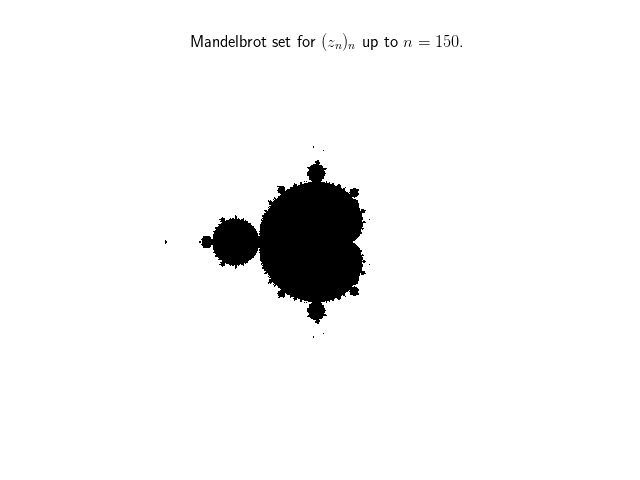

In [9]:
chaos.Mandelbrot_disp(0,0,2,t_max=150).disp_mandel()
plt.gca()
plt.title(r'Mandelbrot set for $(z_n)_n$ up to $n=150$.')
plt.show()

The bulb on the left of the main cardioids is also surrounded by cardioids of different sizes repeating themselves thus the fractal.

The figure below shows us both why there could be a confusion about the self-similarity simply looking at the Mandelbrot set for one point. However, we can clearly see with the picture on the right that there is not self-similarity everywhere and at every scale.

<IPython.core.display.Javascript object>


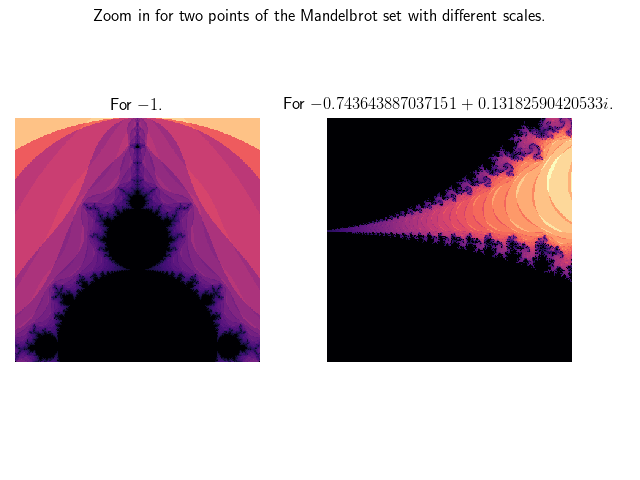

In [10]:
plt.figure()
plt.suptitle("Zoom in for two points of the Mandelbrot set with different scales.")
plt.subplot(1, 2, 1)
mandel = chaos.Mandelbrot_disp(-1,0,1,150).mandel_loop(go_up=True)
plt.imshow(mandel, cmap='magma')
plt.title('For $-1$.')
plt.axis('off')

plt.subplot(1, 2, 2)
mandel2 = chaos.Mandelbrot_disp(-0.743643887037151, 0.13182590420533, 0.1, 150).mandel_loop(go_up=True)
plt.imshow(mandel2, cmap='magma')
plt.axis('off')
plt.title('For $-0.743643887037151 + 0.13182590420533i$.')
plt.tight_layout()
plt.show()

### B. Divergence speed and computation <a name="speed"></a>

As you've seen, this package allows us to build the Mandelbrot set using two different ways:

 - a classic black and white Mandelbrot set implemented using a strict boundary conditions to remove any warnings that could happen because of the high value numbers,
 - a colorful Mandelbrot set without a looser condition. Let's call $j$ the current iteration, the instruction is:
     - if the squared module of the point exceeds $4$, then assign the point the value $j$ (when `go_up` is set to `False`,
     - if the squared module of the point exceeds $4$, then assign the point the value $(2+j)^{-1}$ (when `go_up` is set to `True`).

The second one is very useful especially to see the symmetric structure of the Mandelbrot set around the real axis.

<IPython.core.display.Javascript object>


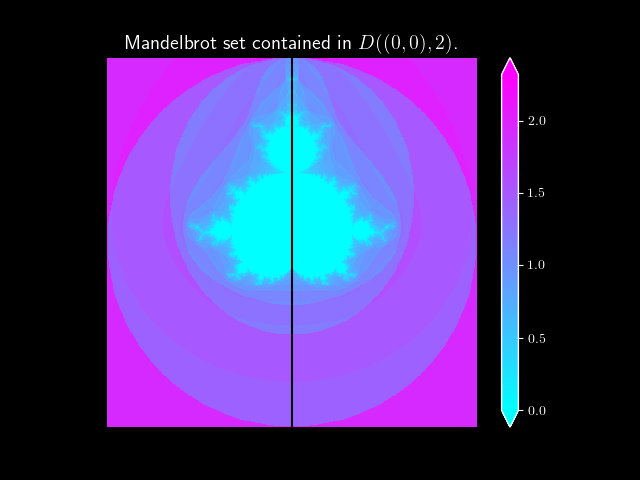

In [14]:
mandel = chaos.Mandelbrot_disp(0,0,2,t_max=150).mandel_loop(go_up=True)
fig, ax = plt.subplots()
pict = ax.imshow(mandel, cmap='cool')
ax.axvline(x=200, color='black')
fig.colorbar(pict, extend='both')
plt.axis('off')
plt.title(r"Mandelbrot set contained in $D((0,0), 2)$.")
plt.show()

We can also evaluate the number of pixels for each color using an histogram. Let's try it around the point $-0.5$ with a windows of $1.5$.

<IPython.core.display.Javascript object>


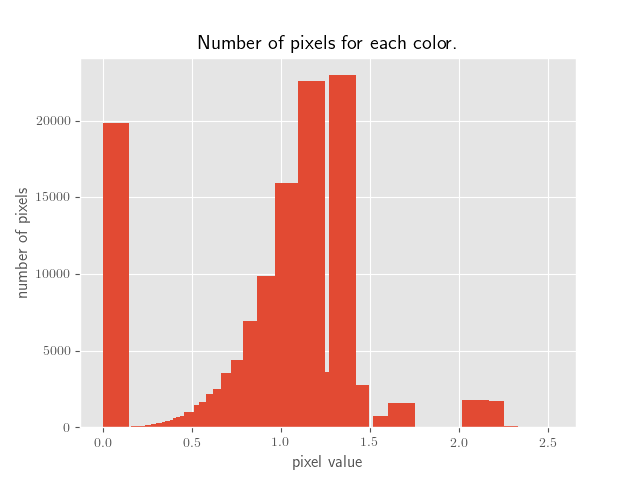

<IPython.core.display.Javascript object>


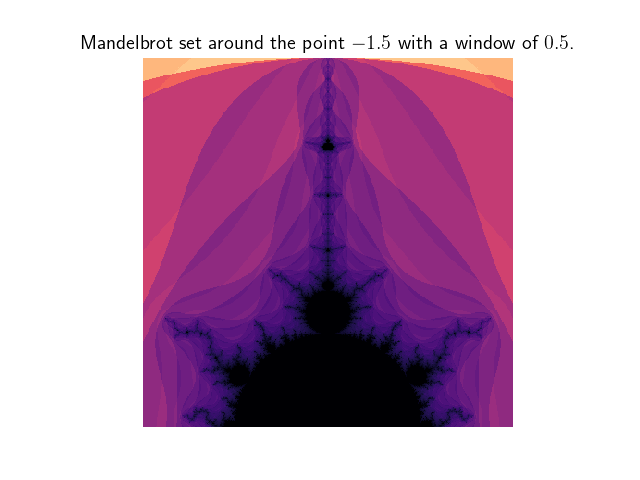

In [7]:
chaos.histogram(-1.5, 0, .5)
plt.gca()
plt.title("Number of pixels for each color.")
plt.xlabel('pixel value')
plt.ylabel('number of pixels')
plt.show()
plt.figure()
mandel = chaos.Mandelbrot_disp(-1.5, 0, .5, 150).mandel_loop()
plt.axis('off')
plt.imshow(mandel, cmap='magma')
plt.title(r'Mandelbrot set around the point $-1.5$ with a window of $0.5$.')
plt.show()

### C Transformation of the Mandelbrot set <a name='transform'></a>
The equation to create the Mandelbrot set is $z_{n+1}=z_n^2+c$ with $z_0=0$. However, when we transform the Mandelbrot set by changing the recurrence function, we can get very artistic images. For example, let's try (with $z_0=0$), the recurrence $$z_{n+1}=\cosh{z_n}+c^{-2}.$$

And one can play with the recurrence function in order to produce sets that are simply eye-candy.

<IPython.core.display.Javascript object>


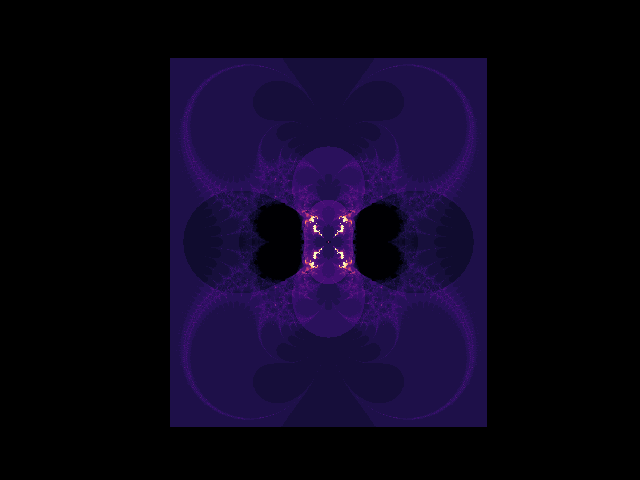

In [15]:
def f(z,c):
     return(np.cosh(z) + 1/(c**2))
beautiful_image = chaos.Mandelbrot_disp(0, 0, 5, 500, 800).mandel_transform(FUN=f)
plt.figure()
plt.imshow(beautiful_image[50:750,100:700], cmap='magma')
plt.axis('off')
plt.show()

## 4. Visualization of the link <a name='visu'></a>
On the real axis, there is a bijective link between the bifurcation bifurcation diagram of the logistic map and the Mandelbrot set. This link is shown by this animation below:

In [13]:
anim = chaos.connections()
clear_output(wait=True)
anim

On this animation there are two Mandelbrot-associated objects: the Mandelbrot set and it's associated cobweb diagram. The moving red lines shows the place that we are on these three graphs, at the same time and the associated attractive points for the **real** sequence $x_{n+1}=x_n^2+c$ where $c$ is along the real-axis on $[-2,\frac{1}{4}]$ with $x_0=0$ and $r\in [1,4]$.

The bijective link is given by:
$$z_n=r\left(\frac{1}{2}-x_n\right) \text{ and } c=\frac{r}{2}\left(1-\frac{r}{2}\right).
$$

We can see that when we go from the main bulb to the secondary one is the moment when the first pitchfork appears on the bifurcation diagram of the logistic map. Furthermore, when $c=-1$ in the Mandelbrot set, it's cobweb diagram indicates exactly two oscillations and we can see that even when $r\geq 3.57$, there are points for which this cobweb isn't chaotic just like for the cobweb diagram of the logistic map.

## 5. Conclusion <a name='conclu'></a>
As we saw, there is indeed a link between the Mandelbrot set and the logistic map bifurcation diagram. They are actually the same object but from another point of view.

Knowing that these fractals are linked leads us to wonder, what properties of the logistic map can be reflected on another Mandelbrot-set-associated structure: the Julia's set, which are defined with the same recurrence but now with a fixed $z$ and by variating the former constant $c$.